/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home

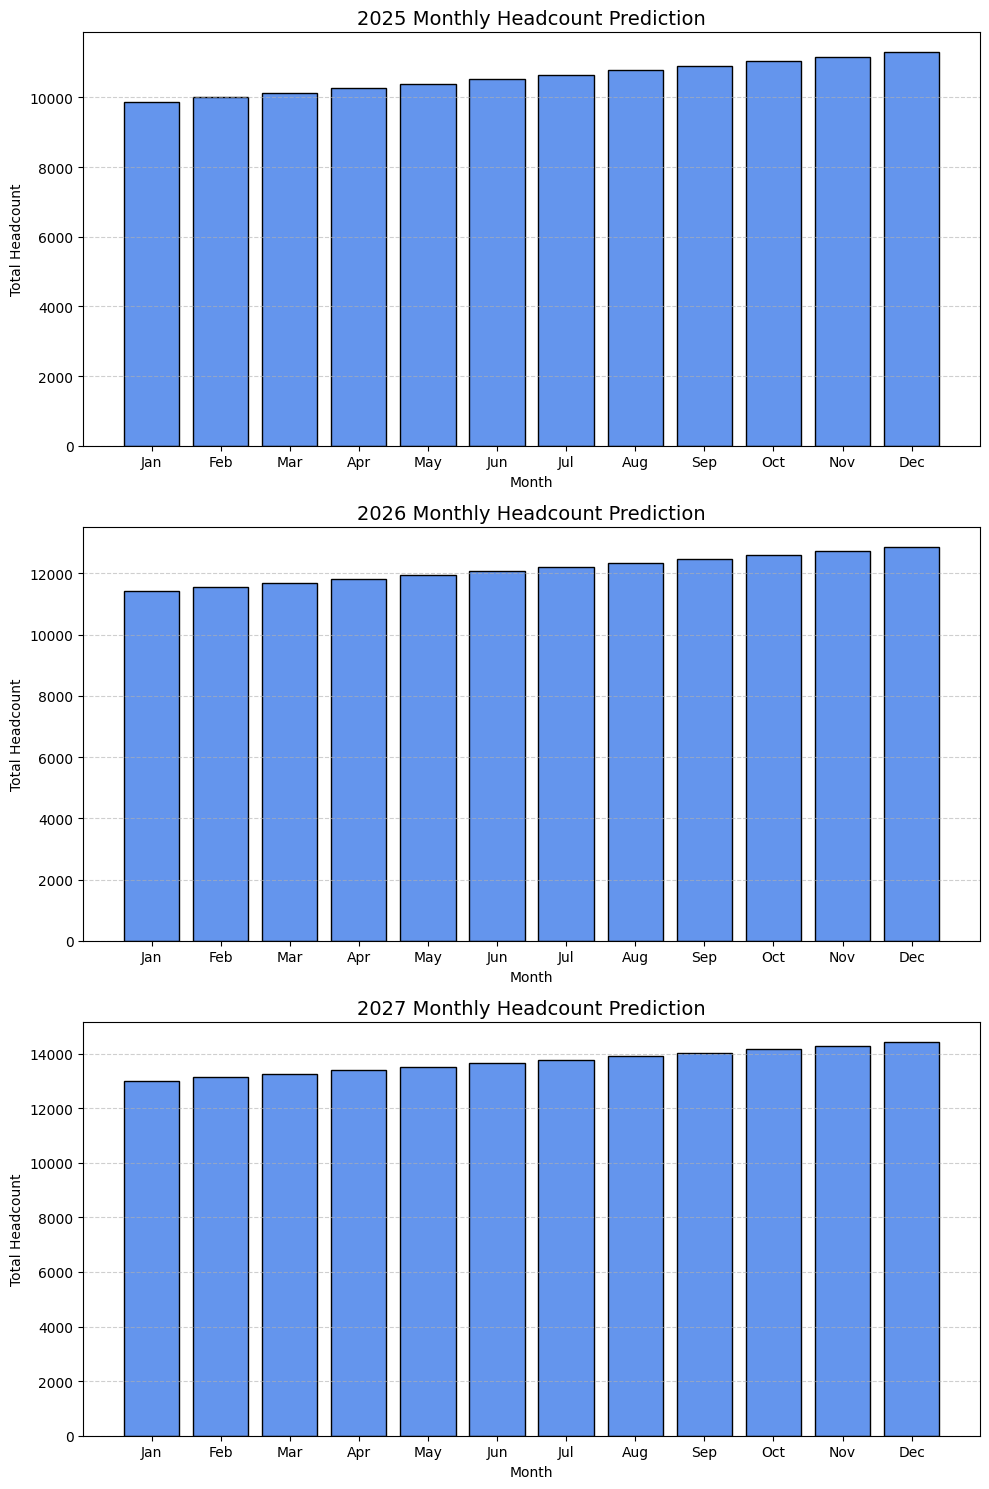

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load all sheets from the Excel file
excel_file = "Monthly Headcount.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None)

# Define month mappings
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
reverse_month_map = {v: k for k, v in month_map.items()}

# Combine data from all sheets into a single DataFrame
combined_data = pd.DataFrame()
for name, sheet in sheets.items():
    if 'Month' in sheet.columns and 'Total' in sheet.columns:
        temp = sheet[['Month', 'Total']].dropna()
        temp['Year'] = int(name) if name.isdigit() else None
        temp['MonthNum'] = temp['Month'].map(month_map)
        temp['Total'] = pd.to_numeric(temp['Total'], errors='coerce')
        temp = temp.dropna()
        temp['Total'] = temp['Total'].astype(int)
        combined_data = pd.concat([combined_data, temp], ignore_index=True)

# Create a continuous time index
min_year = combined_data['Year'].min()
combined_data['TimeIndex'] = (combined_data['Year'] - min_year) * 12 + combined_data['MonthNum']

# Train model
X = combined_data[['TimeIndex']]
y = combined_data['Total']
model = LinearRegression()
model.fit(X, y)

# Predict for Jan 2025 to Dec 2027 (36 months)
future_years = [2025, 2026, 2027]
future_data = []

for year in future_years:
    for month_num in range(1, 13):
        time_index = (year - min_year) * 12 + month_num
        predicted_total = model.predict(np.array([[time_index]]))[0]
        future_data.append({
            'Year': year,
            'MonthNum': month_num,
            'Month': reverse_month_map[month_num],
            'PredictedTotal': int(predicted_total)
        })

future_df = pd.DataFrame(future_data)

# Plot bar graphs
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for idx, year in enumerate(future_years):
    year_df = future_df[future_df['Year'] == year]
    axes[idx].bar(year_df['Month'], year_df['PredictedTotal'], color='cornflowerblue', edgecolor='black')
    axes[idx].set_title(f"{year} Monthly Headcount Prediction", fontsize=14)
    axes[idx].set_xlabel("Month")
    axes[idx].set_ylabel("Total Headcount")
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()